<a href="https://colab.research.google.com/github/RedPanda54/Machine_Learning_study/blob/main/GMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

Url = "https://raw.githubusercontent.com/RedPanda54/Machine_Learning_study/main/insurance.csv"
data = pd.read_csv(Url)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [2]:
# 결측치 확인
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**군집 결정**

In [3]:
# 특정 column만 선택
selected_data = data[['age', 'charges']]

In [19]:
from sklearn.mixture import GaussianMixture

n_components = range(1, 50)  # 군집 개수 후보
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(selected_data) for n in n_components]
aic = [model.aic(selected_data) for model in models]
bic = [model.bic(selected_data) for model in models]

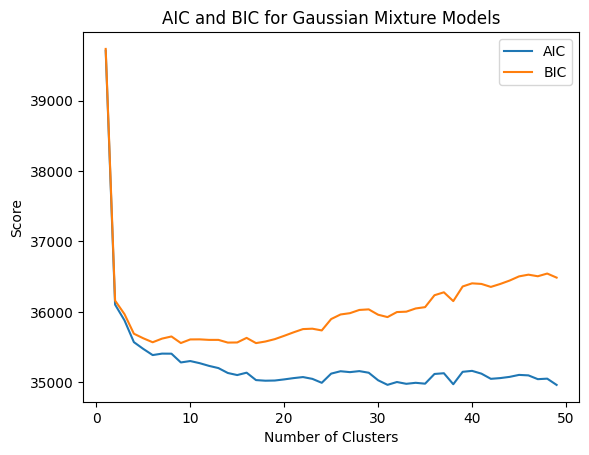

In [20]:
import matplotlib.pyplot as plt

# AIC와 BIC 값을 그래프로 표시
plt.plot(n_components, aic, label='AIC')
plt.plot(n_components, bic, label='BIC')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.legend(loc='best')
plt.title('AIC and BIC for Gaussian Mixture Models')
plt.show()

**2차원 군집화**

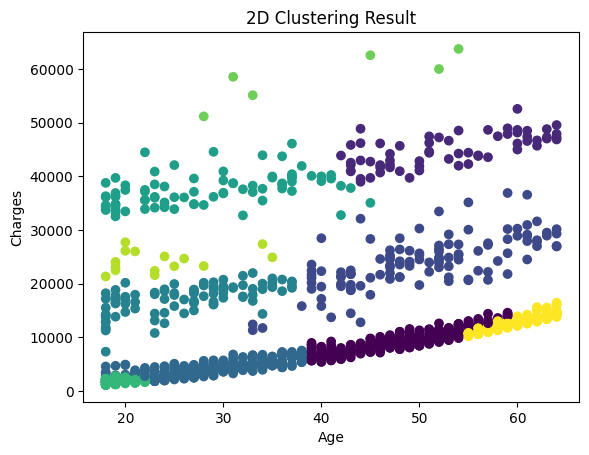

In [21]:
# GMM 모델 생성 및 학습
gmm = GaussianMixture(n_components=10, covariance_type='full', random_state=42)
gmm.fit(selected_data)

# 군집 예측
labels = gmm.predict(selected_data)

# 군집화 결과 시각화
plt.scatter(selected_data['age'], selected_data['charges'], c=labels, cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('2D Clustering Result')
plt.show()

**샘플 5개**

In [22]:
# 난수 발생을 제어하기 위해 seed 설정
np.random.seed(42)

# GMM 모델을 사용하여 5개의 샘플 데이터 생성
samples = gmm.sample(n_samples=5)

# 생성된 샘플 데이터 출력
print(samples)

(array([[5.24028803e+01, 1.04062732e+04],
       [6.04628512e+01, 4.64921476e+04],
       [4.24643313e+01, 1.22138476e+04],
       [3.07783740e+01, 3.23363816e+03],
       [6.15507686e+01, 1.32957507e+04]]), array([0, 1, 2, 3, 9]))


**2% 이하의 이상치**

In [26]:
import pandas as pd

# 'charges' 열에서 2% 이하의 이상치를 찾기 위한 threshold 계산
threshold = selected_data['charges'].quantile(0.02)

# 이상치를 포함하는 행 추출
outliers = selected_data[selected_data['charges'] <= threshold]

# 이상치 출력
print(outliers)

      age    charges
22     18  1137.0110
77     21  1532.4697
136    19  1261.4420
194    18  1137.4697
236    18  1615.7667
359    18  1607.5101
374    20  1391.5287
385    19  1261.8590
410    19  1621.3402
442    18  1149.3959
478    21  1534.3045
487    19  1253.9360
513    19  1256.2990
584    19  1242.8160
663    18  1136.3994
681    19  1242.2600
723    19  1263.2490
781    18  1146.7966
791    19  1252.4070
808    18  1131.5066
840    21  1526.3120
866    18  1141.4451
940    18  1121.8739
1244   18  1135.9407
1251   19  1241.5650
1292   21  1515.3449
1317   18  1163.4627
